# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")

# Load the Data

In [3]:
df = pd.read_csv("D:\\new project\\dataset.csv")

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14024\1151330334.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\\new project\\dataset.csv")


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


# Initial Data Exploration

In [3]:
# Display first few rows
print(df.head())

# Display last few rows
print(df.tail())

# Get DataFrame information
print(df.info())

# Get descriptive statistics
print(df.describe())

# Get column names
print(df.columns)

# Get shape of DataFrame
print(df.shape)

   YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

  LocationID  TopicID QuestionID DataValueTypeID  Stratificati

In [23]:
# List unique values in a specific column
print(df['Topic'].unique())

['Asthma' 'Cancer' 'Chronic Kidney Disease'
 'Chronic Obstructive Pulmonary Disease' 'Cardiovascular Disease'
 'Diabetes' 'Disability' 'Reproductive Health' 'Alcohol' 'Arthritis'
 'Tobacco' 'Nutrition, Physical Activity, and Weight Status'
 'Mental Health' 'Older Adults' 'Oral Health' 'Overarching Conditions'
 'Immunization']


# Dealing with Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1185676
DataValueUnit                 152123
DataValueType                      0
DataValue                     378734
DataValueAlt                  381098
DataValueFootnoteSymbol       791966
DatavalueFootnote             791966
LowConfidenceLimit            503296
HighConfidenceLimit           503296
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1185676
Stratification2              1185676
StratificationCategory3      1185676
Stratification3              1185676
GeoLocation                    10166
ResponseID                   1185676
LocationID                         0
TopicID                            0
QuestionID                         0
D

In [4]:
# Drop columns with all missing values and rows with missing DataValue
df = df.drop(columns=['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3'])
df = df.dropna(subset=['DataValue'])
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
df = df.dropna(subset=['DataValue'])

# Convert YearStart and YearEnd to datetime type
df['YearStart'] = pd.to_datetime(df['YearStart'], format='%Y')
df['YearEnd'] = pd.to_datetime(df['YearEnd'], format='%Y')

# Handle missing values in LowConfidenceLimit and HighConfidenceLimit
df['LowConfidenceLimit'] = df['LowConfidenceLimit'].fillna(df['LowConfidenceLimit'].mean())
df['HighConfidenceLimit'] = df['HighConfidenceLimit'].fillna(df['HighConfidenceLimit'].mean())


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804578 entries, 0 to 1185675
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   YearStart                  804578 non-null  datetime64[ns]
 1   YearEnd                    804578 non-null  datetime64[ns]
 2   LocationAbbr               804578 non-null  object        
 3   LocationDesc               804578 non-null  object        
 4   DataSource                 804578 non-null  object        
 5   Topic                      804578 non-null  object        
 6   Question                   804578 non-null  object        
 7   DataValueUnit              699340 non-null  object        
 8   DataValueType              804578 non-null  object        
 9   DataValue                  804578 non-null  float64       
 10  DataValueAlt               804578 non-null  float64       
 11  DataValueFootnoteSymbol    14976 non-null   object 

# Mortality Rates for Different Chronic Diseases Over the Years

In [5]:
# Filter the dataset for questions related to mortality
mortality_df = df[df['Question'].str.contains('mortality', case=False, na=False)]

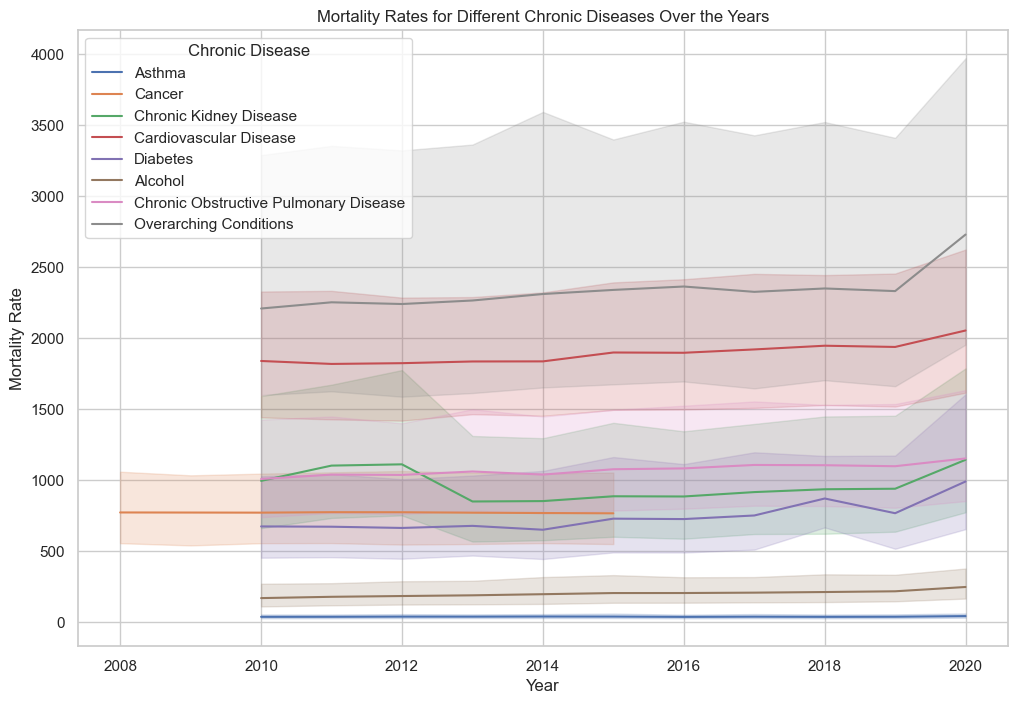

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=mortality_df, x='YearStart', y='DataValue', hue='Topic')
plt.title('Mortality Rates for Different Chronic Diseases Over the Years')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend(title='Chronic Disease')
plt.show()

# Geographic Variations in Cancer Mortality Rates

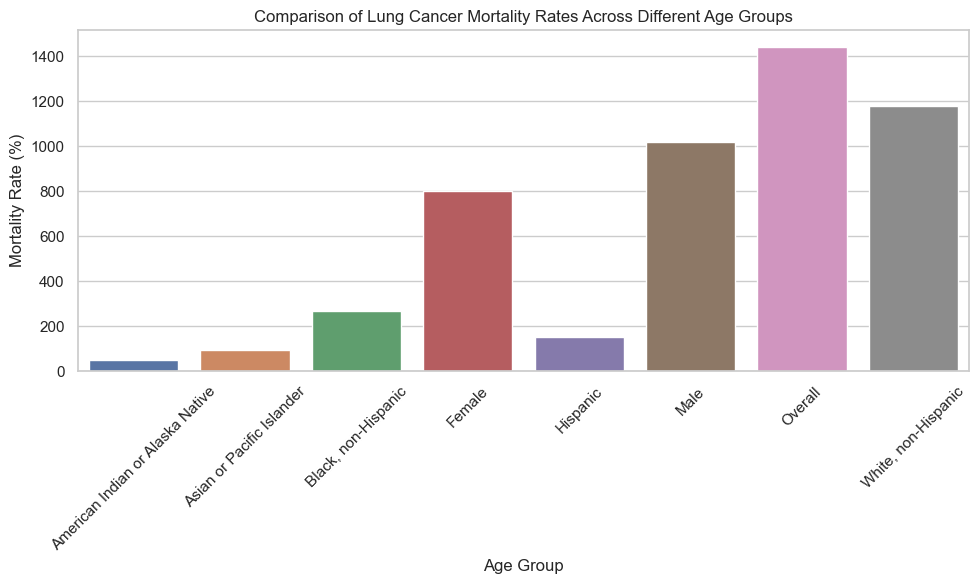

In [8]:
# Filter data for lung cancer mortality
lung_cancer_mortality = mortality_df[mortality_df['Topic'] == 'Cancer']

# Group by age groups and calculate average mortality rates
mortality_by_cat = lung_cancer_mortality.groupby('Stratification1')['DataValueAlt'].mean().reset_index()

# Plotting comparison of mortality rates between age groups
plt.figure(figsize=(10, 6))
sns.barplot(x='Stratification1', y='DataValueAlt', data=mortality_by_cat)
plt.title('Comparison of Lung Cancer Mortality Rates Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Disease Mortality Rates by Location

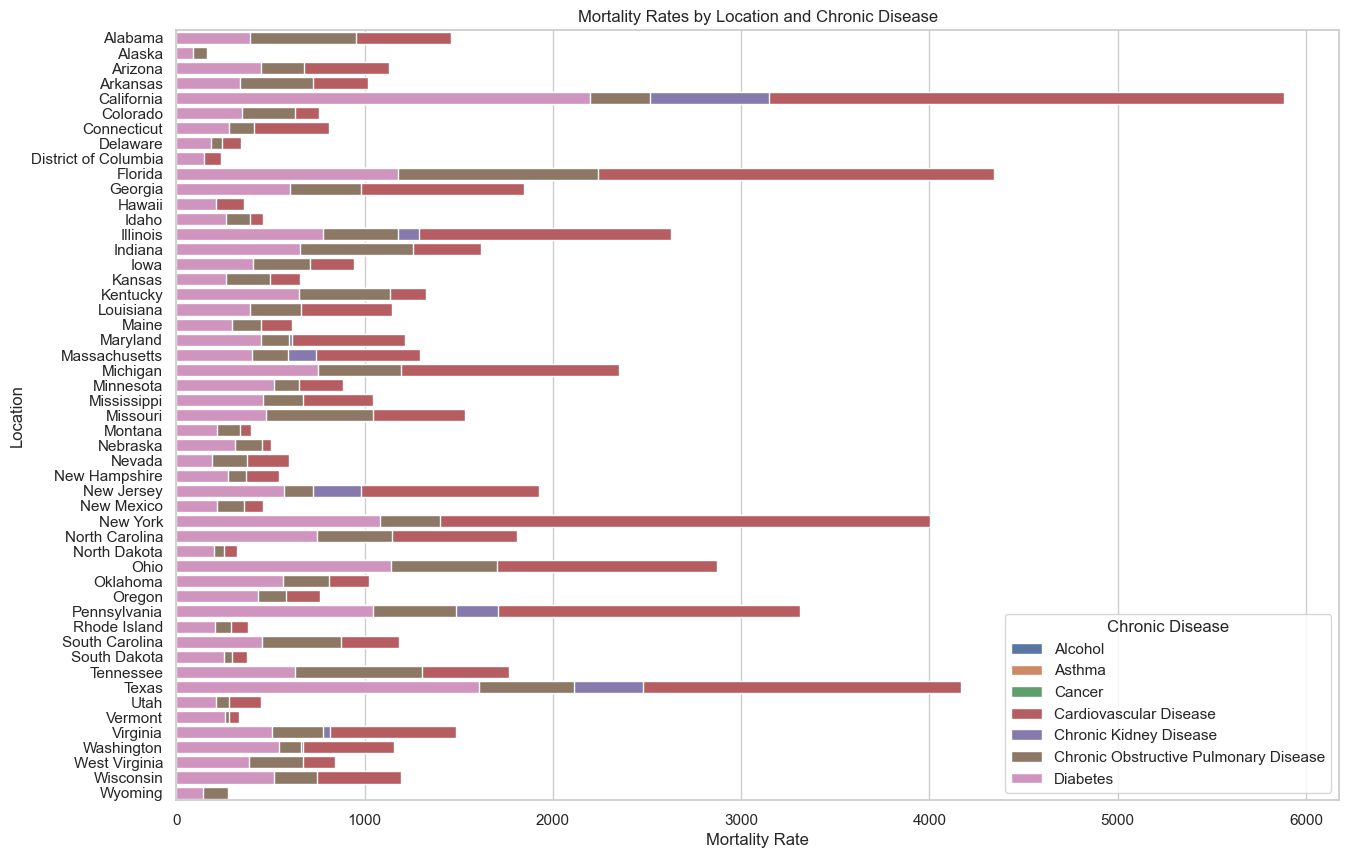

In [6]:
# Ensure that we have relevant data for chronic diseases
relevant_conditions = ['Asthma', 'Cancer', 'Chronic Kidney Disease',
       'Cardiovascular Disease', 'Diabetes', 'Alcohol',
       'Chronic Obstructive Pulmonary Disease']
filtered_df = mortality_df[mortality_df['Topic'].isin(relevant_conditions)]

relevant_location = filtered_df[filtered_df['LocationDesc'] != 'United States']

# Aggregate data by location and chronic disease
location_mortality = relevant_location.groupby(['LocationDesc', 'Topic'])['DataValue'].mean().reset_index()

# Plot mortality rates by location
plt.figure(figsize=(15, 10))
sns.barplot(data=location_mortality, x='DataValue', y='LocationDesc', hue='Topic', dodge=False)
plt.title('Mortality Rates by Location and Chronic Disease')
plt.xlabel('Mortality Rate')
plt.ylabel('Location')
plt.legend(title='Chronic Disease')
plt.show()


# Trend in Mortality Rates for Overarching Conditions Over Time

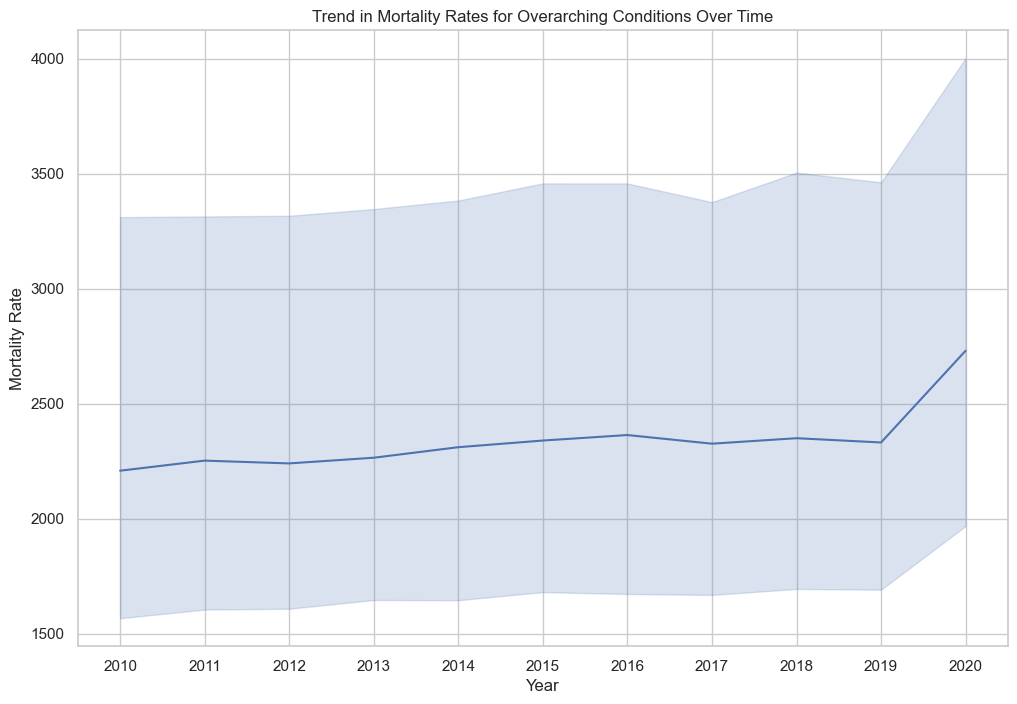

In [83]:
# Plot the trend in mortality rates for a specific disease (e.g., Diabetes)
diabetes_mortality = mortality_df[mortality_df['Topic'] == 'Overarching Conditions']

plt.figure(figsize=(12, 8))
sns.lineplot(data=diabetes_mortality, x='YearStart', y='DataValue')
plt.title('Trend in Mortality Rates for Overarching Conditions Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()

# Mortality Rates by Stratification Category

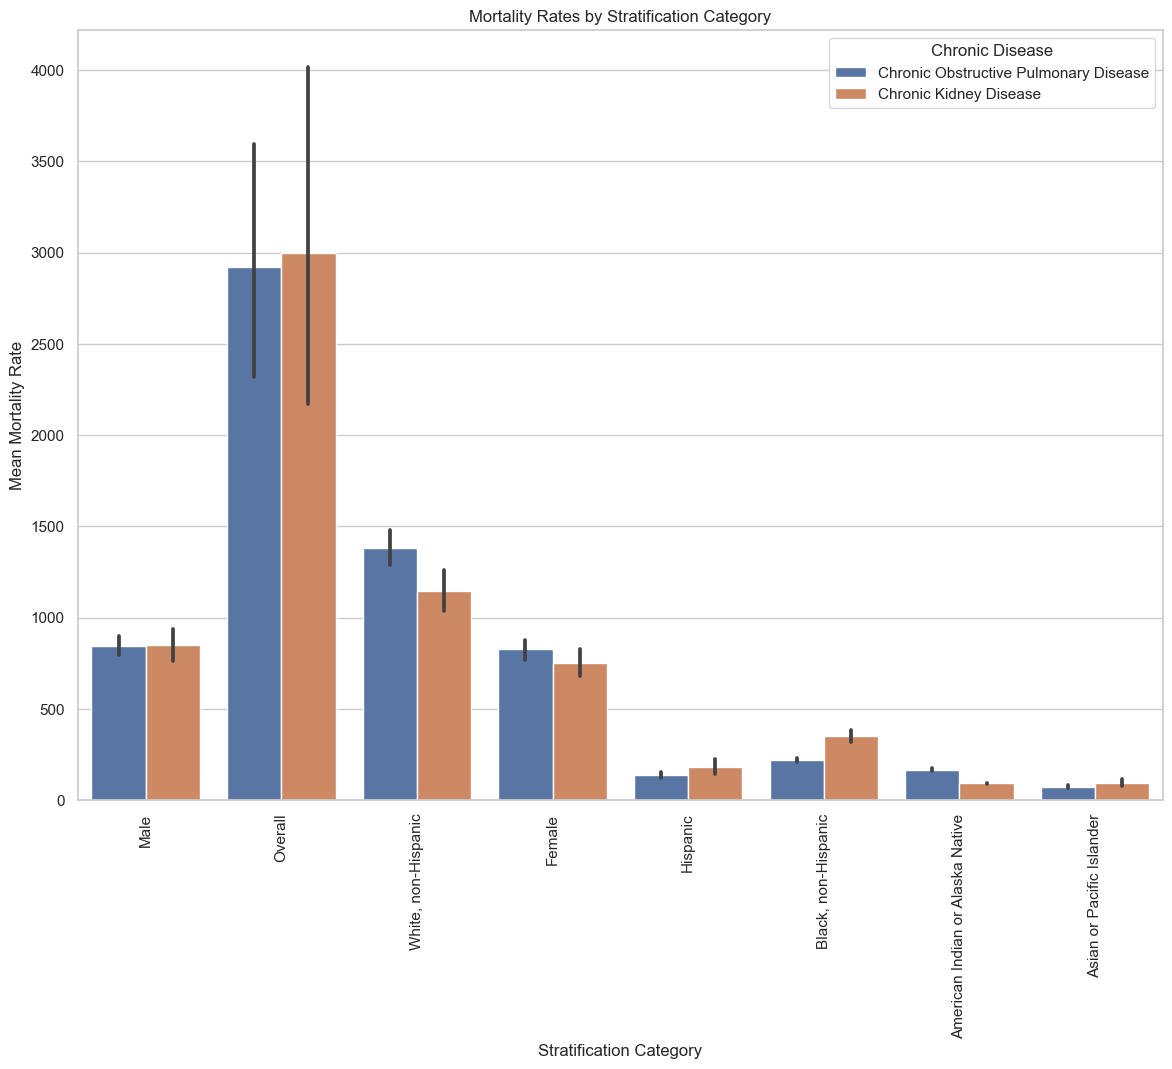

In [81]:
# Plot mortality rates by stratification categories (e.g., gender, race)

topic_order = ['Chronic Obstructive Pulmonary Disease', 'Chronic Kidney Disease']

plt.figure(figsize=(14, 10))
sns.barplot(data=mortality_df, x='Stratification1', y='DataValue', hue='Topic', hue_order=topic_order)
plt.title('Mortality Rates by Stratification Category')
plt.xlabel('Stratification Category')
plt.ylabel('Mean Mortality Rate')  
plt.xticks(rotation=90)
plt.legend(title='Chronic Disease')
plt.show()

# Chronic Diseases with the Highest Mortality Rates

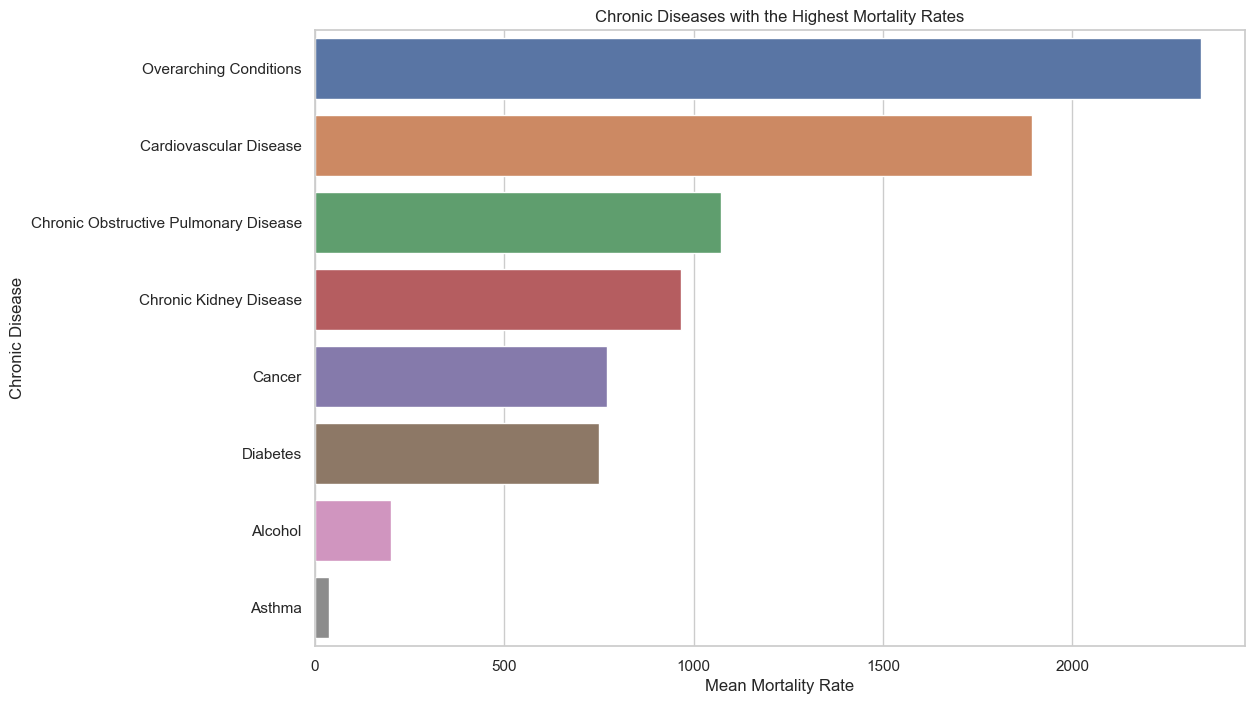

In [84]:
# Aggregate data to find the mean mortality rate for each chronic disease
mean_mortality = mortality_df.groupby('Topic')['DataValue'].mean().reset_index()

# Sort values to find the highest mortality rates
mean_mortality = mean_mortality.sort_values(by='DataValue', ascending=False)

# Plot the chronic diseases with the highest mortality rates
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_mortality, x='DataValue', y='Topic')
plt.title('Chronic Diseases with the Highest Mortality Rates')
plt.xlabel('Mean Mortality Rate')
plt.ylabel('Chronic Disease')
plt.show()


# Comparison of Cancer Mortality Rates by Gender

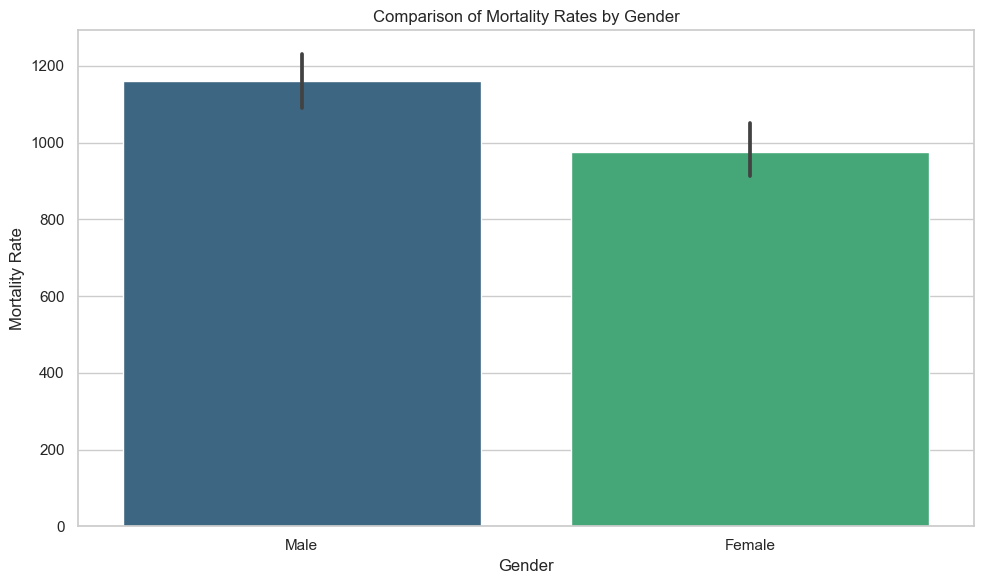

In [90]:
mortality_gender =  mortality_df[mortality_df['StratificationCategory1'] == 'Gender']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Stratification1', y='DataValue', data=mortality_gender, palette='viridis')
plt.title('Comparison of Mortality Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.tight_layout()
plt.show()

# Mortality Rates by Chronic Disease in the United States

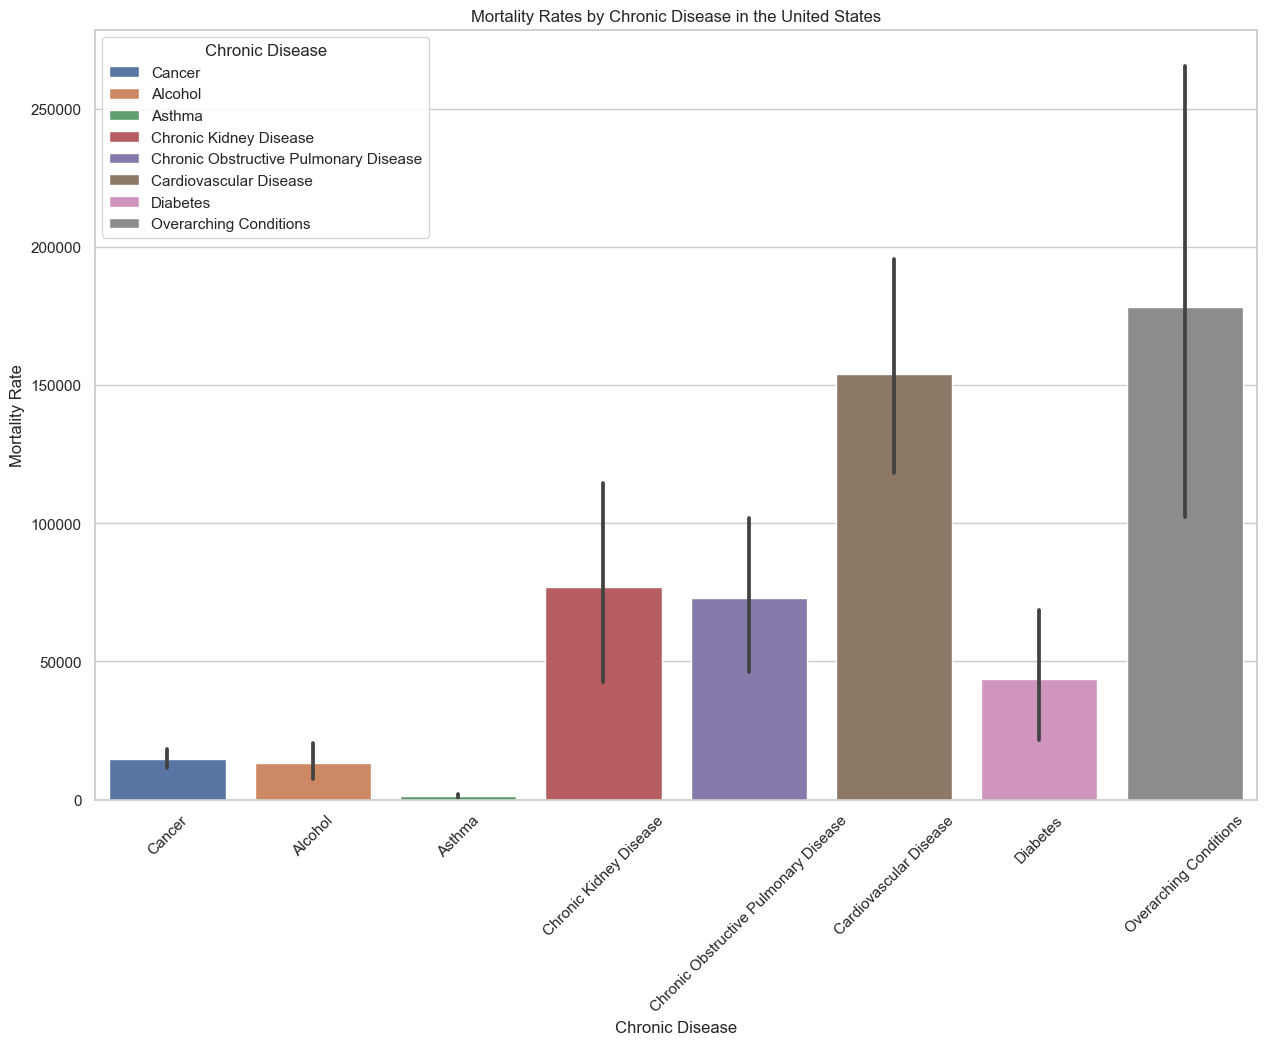

In [12]:
# Filter data to include only United States
filtered_df_us = mortality_df[mortality_df['LocationDesc'] == 'United States']

# Set the figure size directly within sns.catplot
plt.figure(figsize=(15, 10))
sns.barplot(data=filtered_df_us, x='Topic', y='DataValue', hue='Topic', dodge=False)
plt.title('Mortality Rates by Chronic Disease in the United States')
plt.xlabel('Chronic Disease')
plt.ylabel('Mortality Rate')
plt.legend(title='Chronic Disease', loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Correlation Matrix of Mortality Rates for Chronic Diseases

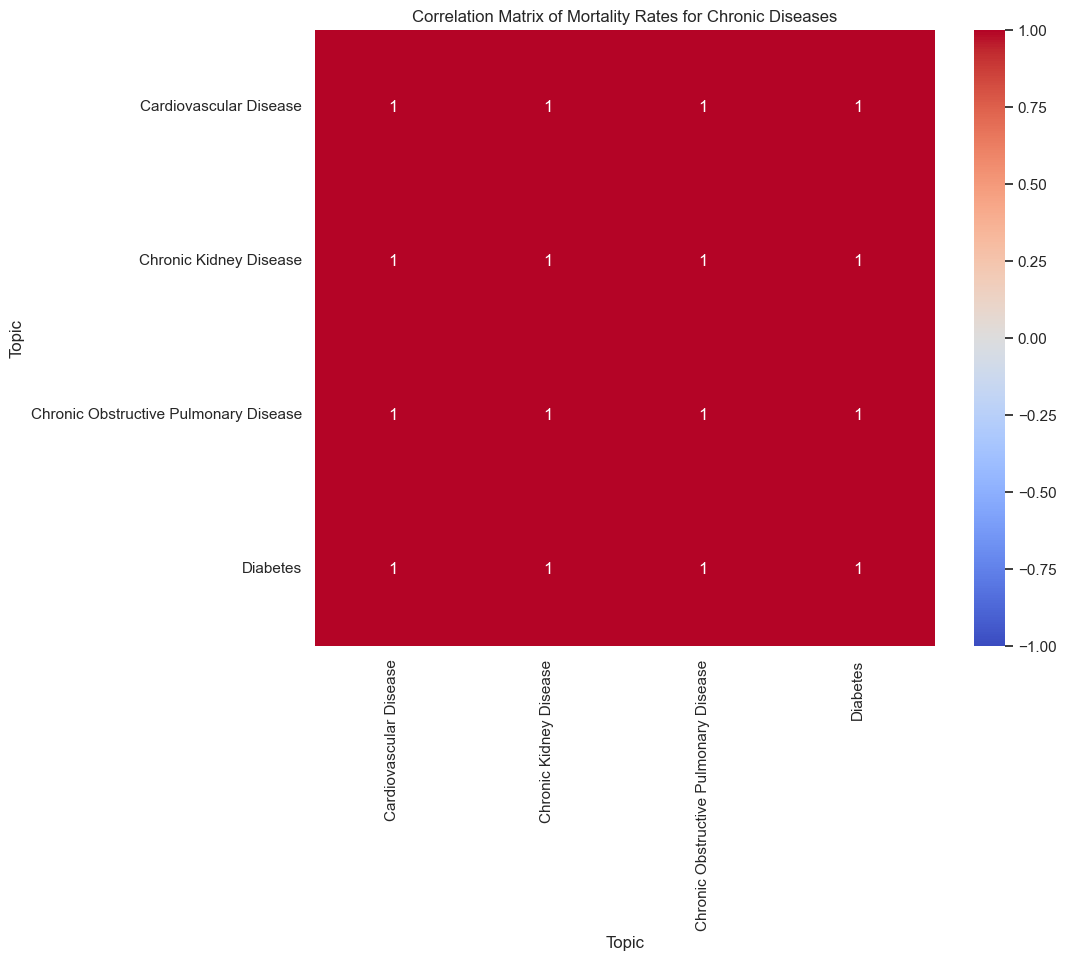

In [9]:
# Filter dataset for mortality rates of various chronic diseases
chronic_diseases = ['Diabetes', 'Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 
                    'Chronic Kidney Disease']
chronic_mortality = mortality_df[mortality_df['Topic'].isin(chronic_diseases)]

# Pivot the dataset
pivot_df = chronic_mortality.pivot_table(index='LocationDesc', columns='Topic', values='DataValue', aggfunc=np.mean)

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mortality Rates for Chronic Diseases')
plt.show()


Based on our comprehensive analysis, we observed the following:
- **Missing Values:** Handled missing values appropriately to ensure the integrity of the dataset.
- **Outliers:** Identified and analyzed outliers using boxplots and Z-score method.
- **Data Preparation:** Performed necessary data preparation steps such as date conversion and feature engineering.
- **EDA:** Conducted exploratory data analysis to understand the data distribution, relationships, and trends.
- **Visualization:** Created various visualizations to present the findings effectively to stakeholders.